In [2]:
import numpy as np
import pandas as pd

In [3]:
import chardet
with open('Datasets/sms spam.csv', 'rb') as f:
    enc = chardet.detect(f.read())
df = pd.read_csv("Datasets/sms spam.csv", encoding = enc['encoding'])

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3084,ham,In da car park,NaN,NaN,NaN
4530,ham,I wish things were different. I wonder when i ...,NaN,NaN,NaN
3187,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
2411,ham,"Come to me right now, Ahmad",NaN,NaN,NaN
2023,ham,Is there any movie theatre i can go to and wat...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [8]:
df.sample(5)

,v1,v2
1866,ham,Or Ì_ go buy wif him then i meet Ì_ later can?
739,ham,Haha mayb u're rite... U know me well. Da feel...
5474,ham,Where's mummy's boy ? Is he being good or bad ...
533,ham,I'll be late...
2360,ham,Had the money issue weigh me down but thanks t...


In [9]:
df.rename(columns={'v1':'target','v2':'text'}, inplace = True)
df.sample(5)

,target,text
5470,ham,I thought slide is enough.
3469,ham,aathi..where are you dear..
1558,ham,Message from . I am at Truro Hospital on ext. ...
951,ham,Shb b ok lor... Thanx...
5360,ham,"Hey, iouri gave me your number, I'm wylie, rya..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

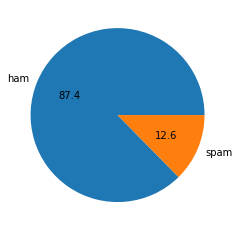

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels = ['ham','spam'],autopct = "%0.1f")
plt.show()

In [18]:
import nltk

In [19]:
dler = nltk.downloader.Downloader('https://pastebin.com/raw/D3TBY4Mj')
dler.download('punkt')

[nltk_data] Error loading punkt: HTTP Error 403: Forbidden


False

In [20]:
df['num_characters'] = df['text'].apply(len)
# df['text'].apply(lambda x:nltk.word_tokenize(x))

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
from keras.preprocessing.text import text_to_word_sequence

In [23]:
df['num_words']=df['text'].apply(lambda x:len(text_to_word_sequence(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [24]:
# df['text'].apply(lambda x:len(sent_tokenize(x)))
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,78.977945,15.610370
std,58.236293,11.269576
min,2.000000,0.000000
25%,36.000000,7.000000
50%,60.000000,12.000000
75%,117.000000,23.000000
max,910.000000,189.000000


In [25]:
df[df['target']==0][['num_characters','num_words']].describe()

,num_characters,num_words
count,4516.000000,4516.000000
mean,70.459256,14.246236
std,56.358207,11.198997
min,2.000000,0.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,18.000000
max,910.000000,189.000000


In [26]:
df[df['target']==1][['num_characters','num_words']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.891271,25.044410
std,30.137753,6.012731
min,13.000000,2.000000
25%,132.000000,23.000000
50%,149.000000,26.000000
75%,157.000000,29.000000
max,224.000000,39.000000


In [27]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

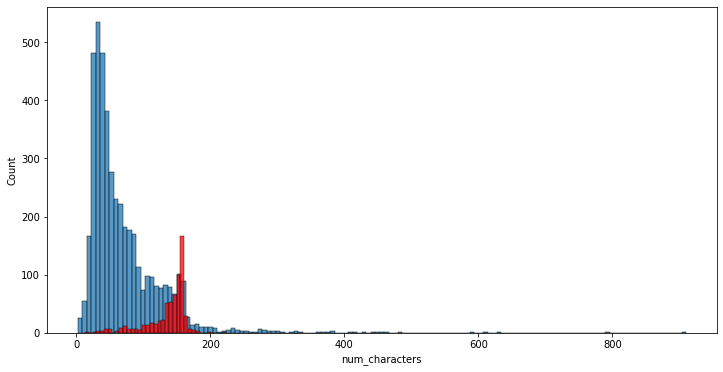

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

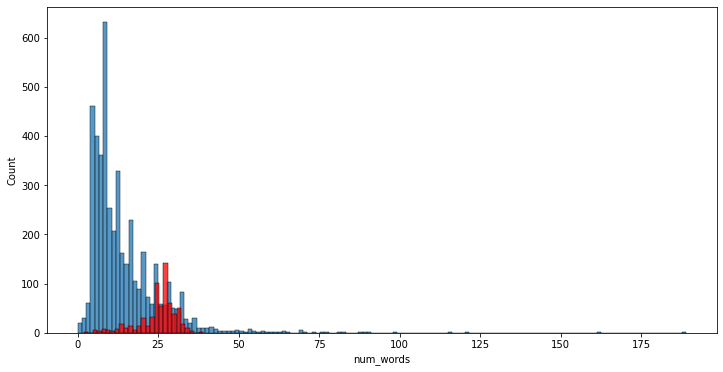

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'], color = 'red')

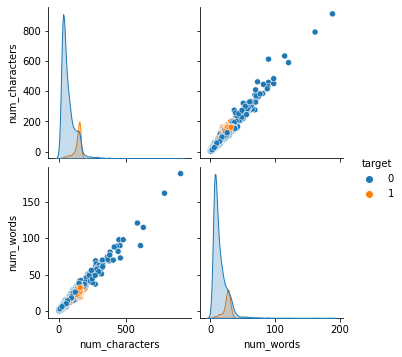

In [30]:
sns.pairplot(df,hue='target')

<AxesSubplot:>

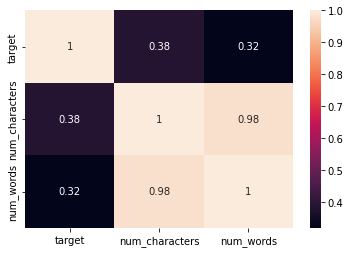

In [31]:
sns.heatmap(df.corr(),annot=True)

In [32]:
# import spacy
# from spacy.lang.en.stop_words import STOP_WORDS

# # print(STOP_WORDS)
# import string 
# string.punctuation

# from nltk.stem.porter import PorterStemmer
# ps = PorterStemmer()
# ps.stem('dancing')

In [33]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = text_to_word_sequence(text)
    y = []
    
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in STOP_WORDS and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [34]:
# transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

In [35]:
# df['text'][0]

In [36]:
df['transformed_text']=df['text'].apply(transform_text)

In [37]:
df.head()

,target,text,num_characters,num_words,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,31,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,u dun earli hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,nah think goe usf live


In [38]:
from wordcloud import WordCloud
wc = WordCloud (width = 500 , height = 500, min_font_size=10,background_color='white')

In [39]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

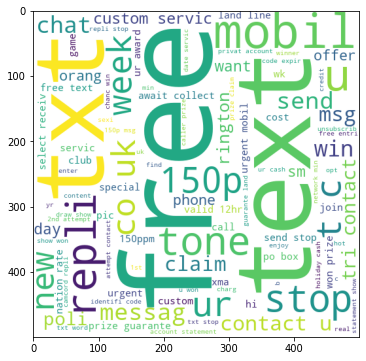

In [40]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [41]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

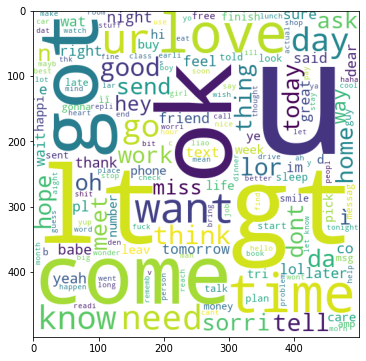

In [42]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [43]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

10738

C:\Users\subham.panda\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


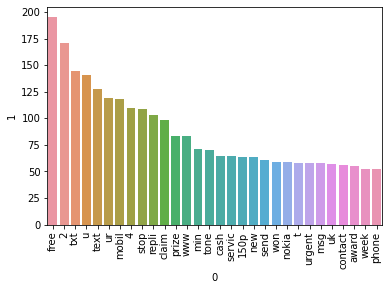

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [47]:
len(ham_corpus)

32249

C:\Users\subham.panda\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


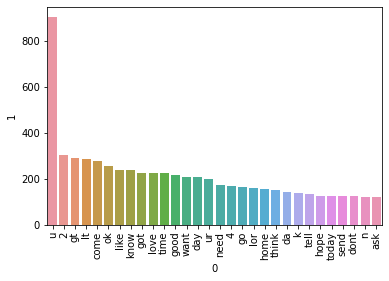

In [48]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [153]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [154]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [155]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [156]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [159]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [160]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [161]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(precision_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

0.8655705996131529
0.4979919678714859
[[771 125]
 [ 14 124]]


In [162]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

0.9864603481624759
0.9769230769230769
[[893   3]
 [ 11 127]]


In [163]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

0.9864603481624759
0.9920634920634921
[[895   1]
 [ 13 125]]


In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [165]:
svc = SVC(kernel = 'sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gdbt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [166]:
clfs = {'SVC':svc, 'KN': knc, 'NB':mnb, 'DT': dtc,'LR':lrc, 'RF': rfc,'AdaBoost':abc, 'BgC': bc, 'ETC': etc, 'GBDT':gdbt, 'xgb':xgb}

In [167]:
def train_classifier(clf,X_trian, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy =accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [168]:
train_classifier(svc,X_train, y_train, X_test, y_test)

(0.9738878143133463, 0.9512195121951219)

In [169]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X_train, y_train, X_test, y_test)
#     print("For",name)
#     print("Accuracy", current_accuracy)
#     print("Precision", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\subham.panda\AppData\Roaming\Python\Python38\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:08:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [126]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.940039,0.801587
1,KN,0.900387,1.000000
2,NB,0.974855,0.894366
3,DT,0.930368,0.902439
4,LR,0.979691,0.975610
5,RF,0.971954,0.982301
6,AdaBoost,0.967118,0.948276
7,BgC,0.968085,0.926829
8,ETC,0.977756,1.000000
9,GBDT,0.949710,1.000000


In [83]:
# old 
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.966151,0.918699
1,KN,0.897485,1.000000
2,NB,0.976789,0.913043
3,DT,0.930368,0.902439
4,LR,0.976789,0.991379
5,RF,0.971954,0.982301
6,AdaBoost,0.967118,0.948276
7,BgC,0.968085,0.926829
8,ETC,0.977756,1.000000
9,GBDT,0.949710,1.000000


In [127]:
performance_df.sort_values('Precision',ascending=False)

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
8,ETC,0.977756,1.000000
9,GBDT,0.949710,1.000000
10,xgb,0.973888,0.982609
5,RF,0.971954,0.982301
4,LR,0.979691,0.975610
6,AdaBoost,0.967118,0.948276
7,BgC,0.968085,0.926829
3,DT,0.930368,0.902439
2,NB,0.974855,0.894366


In [128]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [129]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.940039
1,KN,Accuracy,0.900387
2,NB,Accuracy,0.974855
3,DT,Accuracy,0.930368
4,LR,Accuracy,0.979691
5,RF,Accuracy,0.971954
6,AdaBoost,Accuracy,0.967118
7,BgC,Accuracy,0.968085
8,ETC,Accuracy,0.977756
9,GBDT,Accuracy,0.949710


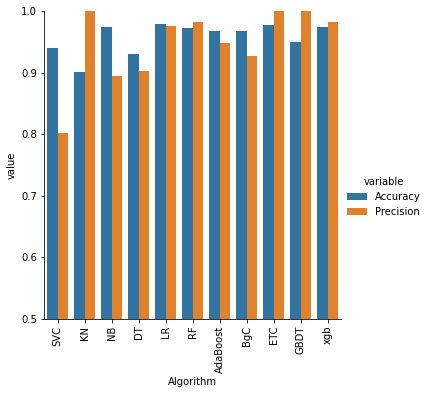

In [130]:
sns.catplot(x = 'Algorithm', y = 'value',hue = 'variable',data = performance_df1,kind='bar',height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [149]:
temp_df =  pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores})
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.974855,0.966667
1,KN,0.904255,1.000000
2,NB,0.977756,1.000000
3,DT,0.930368,0.902439
4,LR,0.957447,0.943396
5,RF,0.973888,0.982609
6,AdaBoost,0.969052,0.956897
7,BgC,0.968085,0.913386
8,ETC,0.977756,0.975207
9,GBDT,0.950677,1.000000


In [106]:
# old
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.966151,0.918699
1,KN,0.897485,1.000000
2,NB,0.976789,0.913043
3,DT,0.930368,0.902439
4,LR,0.976789,0.991379
5,RF,0.971954,0.982301
6,AdaBoost,0.967118,0.948276
7,BgC,0.968085,0.926829
8,ETC,0.977756,1.000000
9,GBDT,0.949710,1.000000


In [152]:
performance_df.merge(temp_df, on = 'Algorithm').sort_values('Precision_max_ft_3000',ascending=False)

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
1,KN,0.900387,1.000000,0.904255,1.000000
2,NB,0.974855,0.894366,0.977756,1.000000
9,GBDT,0.949710,1.000000,0.950677,1.000000
5,RF,0.971954,0.982301,0.973888,0.982609
8,ETC,0.977756,1.000000,0.977756,0.975207
0,SVC,0.940039,0.801587,0.974855,0.966667
10,xgb,0.973888,0.982609,0.976789,0.959677
6,AdaBoost,0.967118,0.948276,0.969052,0.956897
4,LR,0.979691,0.975610,0.957447,0.943396
7,BgC,0.968085,0.926829,0.968085,0.913386


In [170]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [171]:
temp_df =  pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores, 'Precision_scaling':precision_scores})

In [172]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [173]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.940039,0.801587,0.974855,0.966667,0.973888,0.951220
1,KN,0.900387,1.000000,0.904255,1.000000,0.903288,1.000000
2,NB,0.974855,0.894366,0.977756,1.000000,0.986460,0.976923
3,DT,0.930368,0.902439,0.930368,0.902439,0.930368,0.902439
4,LR,0.979691,0.975610,0.957447,0.943396,0.970019,0.957265
5,RF,0.971954,0.982301,0.973888,0.982609,0.973888,0.982609
6,AdaBoost,0.967118,0.948276,0.969052,0.956897,0.969052,0.956897
7,BgC,0.968085,0.926829,0.968085,0.913386,0.968085,0.913386
8,ETC,0.977756,1.000000,0.977756,0.975207,0.977756,0.975207
9,GBDT,0.949710,1.000000,0.950677,1.000000,0.950677,1.000000
